# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [42]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dtcos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
# Read your api key environment variable
load_dotenv("news_api.env")
api_key = os.getenv("news_api")

In [55]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [58]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {Bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 8095


In [59]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {Ethereum_headlines['totalResults']}")

Total articles about Ethereum: 2173


In [60]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...
1,-0.5106,0.000,0.142,0.858,The hacker behind last years big Twitter hack\...
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...
3,0.0000,0.000,0.000,0.000,
4,0.8316,0.246,0.000,0.754,TL;DR: Enter the The Complete Bitcoin (BTC) In...


In [61]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            
            
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
            "Text": text
            
        })
        
    except AttributeError:
        pass
    
Ethereum_df = pd.DataFrame(Ethereum_sentiments)
cols = ["Compound", "Positive", "Negative", "Neutral","Text"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.0000,0.000,0.000,1.000,Famed auction house Christies just sold its fi...
1,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...
2,-0.1531,0.000,0.062,0.938,Here's everything you need to know about non-f...
3,0.4767,0.084,0.000,0.916,OpenSea has been one of a handful of NFT marke...
4,-0.4588,0.066,0.145,0.789,NFTs are the latest cryptocurrency rage these ...


In [62]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,99.000000,99.000000,99.000000,99.000000
mean,0.035384,0.037636,0.027242,0.925040
std,0.315605,0.055160,0.056958,0.126153
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.901500
50%,0.000000,0.000000,0.000000,0.951000
75%,0.102700,0.073500,0.048000,1.000000
max,0.831600,0.246000,0.326000,1.000000


In [63]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.158699,0.064287,0.027117,0.908585
std,0.400100,0.073106,0.053667,0.086368
min,-0.910000,0.000000,0.000000,0.664000
25%,0.000000,0.000000,0.000000,0.864500
50%,0.051500,0.049000,0.000000,0.922000
75%,0.458800,0.091000,0.053250,1.000000
max,0.877900,0.256000,0.299000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score of.064

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score of .878

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score of .256

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [79]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [80]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [83]:
# Complete the tokenizer function
def tokenizer(text):
    sw= set(stopwords.words('english'))
    regex= re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', str(text))
    words= word_tokenize(re_clean)
    lem=[lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]
    
    return tokens

In [84]:
# Create a new tokens column for Bitcoin
Bitcoin_df["tokens"] = Bitcoin_df.Text.apply(tokenizer)
Bitcoin_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,-0.5106,0.000,0.142,0.858,The hacker behind last years big Twitter hack\...,"[hacker, behind, last, year, big, twitter, hac..."
2,0.6369,0.113,0.000,0.887,Some things are best left a mystery at least a...,"[thing, best, left, mystery, least, far, coinb..."
3,0.0000,0.000,0.000,0.000,,[]
4,0.8316,0.246,0.000,0.754,TL;DR: Enter the The Complete Bitcoin (BTC) In...,"[tldr, enter, complete, bitcoin, btc, investme..."


In [85]:
# Create a new tokens column for Ethereum
Ethereum_df["tokens"] = Ethereum_df.Text.apply(tokenizer)
Ethereum_df.head()

,Compound,Positive,Negative,Neutral,Text,tokens
0,0.0000,0.000,0.000,1.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
1,-0.5574,0.000,0.110,0.890,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
2,-0.1531,0.000,0.062,0.938,Here's everything you need to know about non-f...,"[heres, everything, need, know, nonfungible, t..."
3,0.4767,0.084,0.000,0.916,OpenSea has been one of a handful of NFT marke...,"[opensea, ha, one, handful, nft, marketplace, ..."
4,-0.4588,0.066,0.145,0.789,NFTs are the latest cryptocurrency rage these ...,"[nfts, latest, cryptocurrency, rage, day, band..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [86]:
from collections import Counter
from nltk import ngrams

In [88]:
# Generate the Bitcoin N-grams where N=2
bitcoin_words = tokenizer(Bitcoin_df.Text.str.cat())
N=2
bigram_counts_B = Counter(ngrams(bitcoin_words, N))
print(dict(bigram_counts_B))

{('one', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat'): 1, ('legislat', 'charsthe'): 1, ('charsthe', 'hacker'): 1, ('hacker', 'behind'): 1, ('behind', 'last'): 1, ('last', 'year'): 2, ('year', 'big'): 1, ('big', 'twitter'): 1, ('twitter', 'hack'): 1, ('hack', 'ha'): 1, ('ha', 'sentenced'): 1, ('sentenced', 'hard'): 1, ('hard', 'timegraham'): 1, ('timegraham', 'ivan'): 1, ('ivan', 'clark'): 1, ('clark', 'teenage'): 1, ('teenage', 'hacker'): 1, ('hacker', 'broke'): 1, ('broke', 'twitters'): 1, ('twitters', 'system'): 1, ('system', 'took'): 1, ('took', 'verified'): 1, ('verified'

In [89]:
# Generate the Ethereum N-grams where N=2
ethereum_words= tokenizer(Ethereum_df.Text.str.cat())
N= 2
bigram_counts_E = Counter(ngrams(ethereum_words, N))
print(dict(bigram_counts_E))

{('famed', 'auction'): 1, ('auction', 'house'): 2, ('house', 'christies'): 1, ('christies', 'sold'): 1, ('sold', 'first'): 1, ('first', 'purely'): 1, ('purely', 'digital'): 1, ('digital', 'piece'): 1, ('piece', 'art'): 1, ('art', 'whopping'): 1, ('whopping', 'million'): 1, ('million', 'price'): 1, ('price', 'buyer'): 1, ('buyer', 'got'): 1, ('got', 'digital'): 1, ('digital', 'file'): 1, ('file', 'collage'): 1, ('collage', 'image'): 1, ('image', 'complex'): 1, ('complex', 'legac'): 1, ('legac', 'charsone'): 1, ('charsone', 'strictest'): 1, ('strictest', 'crackdown'): 1, ('crackdown', 'worldwidephoto'): 1, ('worldwidephoto', 'michele'): 1, ('michele', 'doying'): 1, ('doying', 'vergeindia'): 1, ('vergeindia', 'reportedly'): 1, ('reportedly', 'moving'): 1, ('moving', 'forward'): 1, ('forward', 'sweeping'): 1, ('sweeping', 'ban'): 1, ('ban', 'cryptocurrencies'): 1, ('cryptocurrencies', 'according'): 1, ('according', 'reuters'): 1, ('reuters', 'country'): 1, ('country', 'legislat'): 1, ('leg

In [90]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [91]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_common= token_count(bitcoin_words, 10)
bitcoin_common

[('reuters', 73),
 ('bitcoin', 73),
 ('charsby', 37),
 ('photo', 31),
 ('ha', 25),
 ('currency', 25),
 ('taken', 23),
 ('stafffile', 22),
 ('virtual', 22),
 ('illustration', 22)]

In [92]:
# Use token_count to get the top 10 words for Ethereum
ethereum_common= token_count(ethereum_words,10)
ethereum_common

[('bitcoin', 25),
 ('cryptocurrency', 23),
 ('ha', 21),
 ('new', 20),
 ('digital', 15),
 ('token', 15),
 ('ethereum', 15),
 ('reuters', 14),
 ('nft', 13),
 ('nfts', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

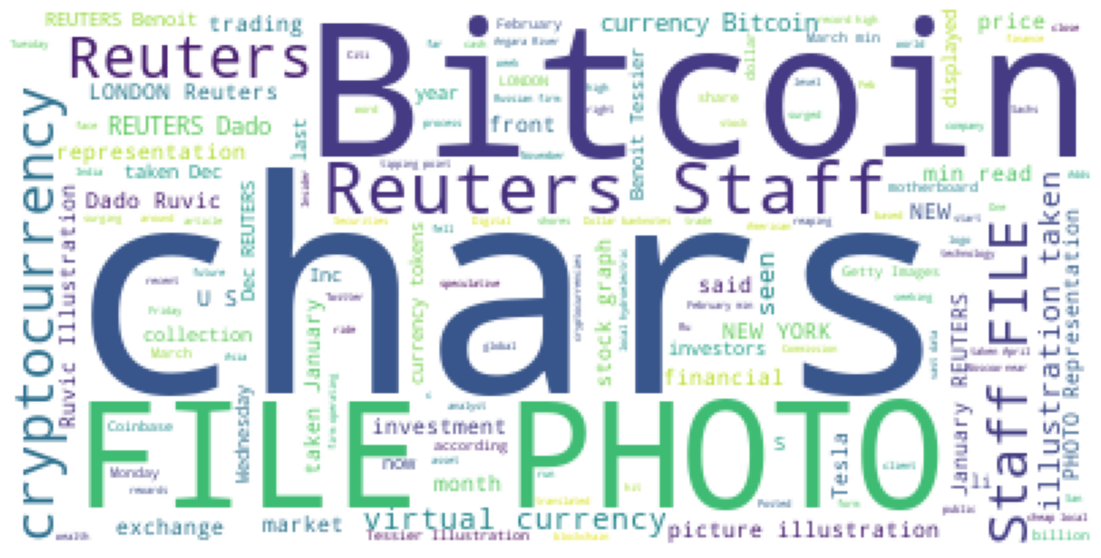

In [114]:
# Generate the Bitcoin word cloud
bitcoin_cloud = WordCloud(background_color='white').generate(Bitcoin_df.Text.str.cat())
bitcoin_cloud
plt.axis("off")
plt.imshow(bitcoin_cloud);

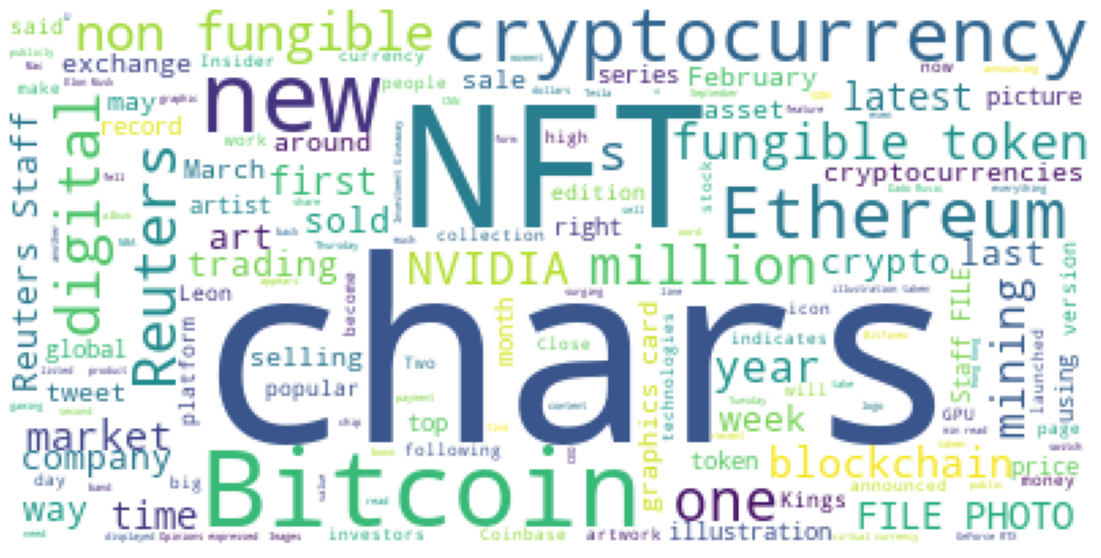

In [115]:
# Generate the Ethereum word cloud
ethereum_cloud = WordCloud(background_color='white').generate(Ethereum_df.Text.str.cat())
ethereum_cloud
plt.axis("off")
plt.imshow(ethereum_cloud);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [116]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [100]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [101]:
# Concatenate all of the Bitcoin text together
concat_bitcoin = Bitcoin_df.Text.str.cat()
concat_bitcoin

'One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]The hacker behind last years big Twitter hack\r\n has just been sentenced to hard time.\r\nGraham Ivan Clark, the teenage hacker who broke\r\n into Twitters systems, took over verified accounts, and used t… [+2552 chars]Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\r\nThe Bitcoin Investment Giveaway includes everything you need to get… [+1641 chars]A proposed law in India would make it a crime to mine, trade, or even hold cryptocurrencies like bitcoin in the country, accor

In [103]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
bitcoin_doc = nlp(concat_bitcoin)
bitcoin_doc

# Add a title to the document
bitcoin_doc.user_data["Title"] = "Bitcoin NER"

In [107]:
# Render the visualization
displacy.render(bitcoin_doc, style = 'ent')

In [108]:
# List all Entities
for i in bitcoin_doc.ents:
    print(i.text, i.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
over $12,000 MONEY
India GPE
Reuters ORG
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Coinbase WORK_OF_ART
American NORP
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
week of February DATE
North American NORP
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
KTS Design/Science Photo Library/Getty Images ORG
The Chicago Board Options Exchange ORG
the US Securities and Exchange Commission ORG
2018 DATE
San Francisco GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reute

---

### Ethereum NER

In [109]:
# Concatenate all of the Ethereum text together
concat_ethereum = Ethereum_df.Text.str.cat()
concat_ethereum

'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars]Here\'s everything you need to know about non-fungible tokens, the latest cryptocurrency craze.\r\nRead the full story here. (And learn even more about NFTs here.)OpenSea has been one of a handful of NFT marketplaces to explode in popularity in recent weeks as collectors wade into the trading of non-fungible tokens on the blockchain. While new startups have be… [+2529 chars]NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for

In [110]:
# Run the NER processor on all of the text
ethereum_doc = nlp(concat_ethereum)
ethereum_doc

# Add a title to the document
ethereum_doc.user_data["Title"] = "Ethereum NER"

In [111]:
# Render the visualization
displacy.render(ethereum_doc, style = 'ent')

In [112]:
# List all Entities
for i in ethereum_doc.ents:
    print(i.text, i.label_)

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
here.)OpenSea GPE
NFT ORG
recent weeks DATE
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
chars]MetaMask ORG
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
more than a year ago DATE
Ethereum ORG
over $12,000 MONEY
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
India GPE
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 23 DATE
Reuters ORG
as much as 6% PERCENT
Asia LOC
Tuesday DATE
around $52,000 MONEY
Kings ORG
Leon PRODUCT
more than $2 millio

---